# KNN classification + Training and Testing split

In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We are going to use the Iris data set

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['species']=[iris.target_names[x] for x in iris.target]

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
print 'Independent variables: \n%s' % iris.feature_names

Independent variables: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print 'Class labels: \n%s' % iris.target_names

Class labels: 
['setosa' 'versicolor' 'virginica']


# Classification using KNN

In [12]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, feature_selection

In [13]:
# We need to define some variables to start our modelling
n_neighbours = range(1,51,2) 

# We need random numbers, BUT we want to be able to provide reproducibility 
np.random.seed(123)


In [14]:
# Load the data 
x = iris.data
y = iris.target 


# We would like to create out training set 
n = int(len(y) * 0.7)

In [16]:
# Stack array in sequence horizointally with hstack

ind = np.hstack( (np.ones(n, dtype=np.bool), np.zeros(len(y) - n, dtype=np.bool) ) )

In [17]:
ind 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [18]:
np.random.shuffle(ind)
ind

array([ True, False, False,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,

In [20]:
# we can create our training and testing set 
X_train, X_test = x[ind], x[ind==False]
Y_train, Y_test = y[ind], y[ind==False]

In [23]:
# Let us do the magic!
score = []
for k in n_neighbours:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, Y_train)
    score.append(clf.score(X_test, Y_test) )

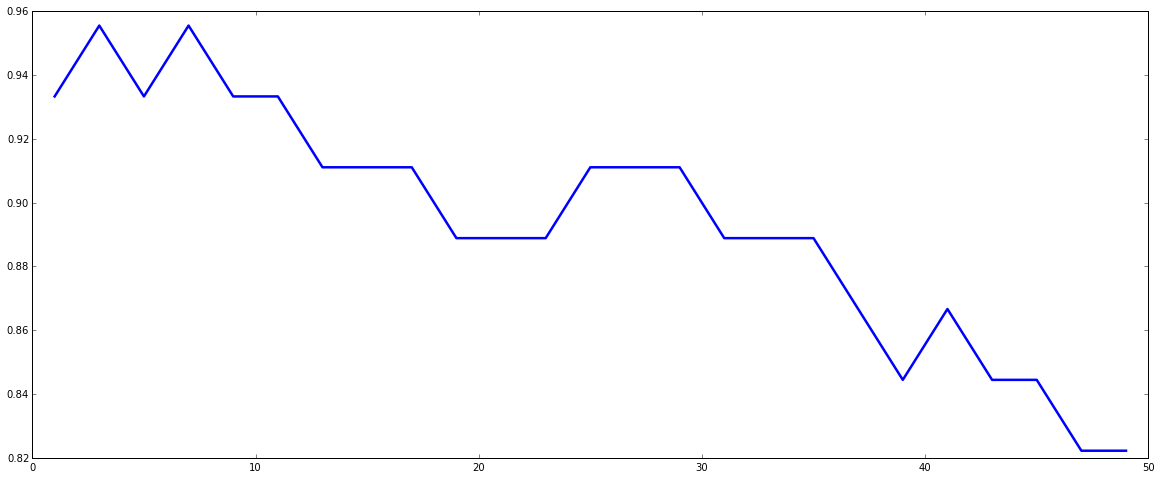

In [25]:
# Let us look at it!
figure(figsize= (20,8 ))
plot( n_neighbours, score, linewidth=2.5 )